### **Load Data**

In [1]:
import pandas as pd 

def load_data(file_path):
    df = pd.read_csv(file_path)

    return df 

file_path ='data/dataset.csv'

df = load_data(file_path)
df.head()

,Date,Store,Product,Value
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000


### **EDA**

In [2]:
# EDA 
def perform_eda(df):
    duplicates = df.duplicated().sum()
    missing_vlaues = df.isna().sum()
    data_info = df.info()

    print(f'Data Structures : {data_info}')
    print(f'\nDuplicates : {duplicates}')
    print(f'\nMissing Values : {missing_vlaues}')

perform_eda(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4320 non-null   int64  
 1   Store    4320 non-null   object 
 2   Product  4320 non-null   object 
 3   Value    4320 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 135.1+ KB
Data Structures : None

Duplicates : 0

Missing Values : Date       0
Store      0
Product    0
Value      0
dtype: int64


In [4]:
# Check statistics
statistics = df.describe().T
print('Summary Statistics')
statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
Date,4320.0,2.019052e+07,8133.852771,2.018010e+07,2.018093e+07,20190624.5,20200321.25,2.020122e+07
Value,4320.0,3.964446e+03,1447.632879,1.838532e+03,2.580927e+03,3997.1,5187.00,8.989514e+03


In [6]:
# Check unique values 
def check_unique_values(df):
    for column_name in df.columns:
        print(f'Unique values in {column_name} columns:')
        unique_values = df[column_name].unique()
        print(unique_values)
        print('--'*30)

check_unique_values(df)

Unique values in Date columns:
[20180101 20180102 20180103 ... 20201214 20201215 20201216]
------------------------------------------------------------
Unique values in Store columns:
['LOS_ANGELES' 'SAN_FRANCISCO']
------------------------------------------------------------
Unique values in Product columns:
['TESLA_MODEL_X' 'TESLA_MODEL_S']
------------------------------------------------------------
Unique values in Value columns:
[2926.       2687.531    2793.       ... 3045.01906  2443.132196
 2326.531596]
------------------------------------------------------------


### **Feature Engineering**

In [7]:
# Create dataframe for the LA store and Model X
df = df[(df['Store'] == 'LOS_ANGELES') & (df['Product'] == 'TESLA_MODEL_X')]
df.head()

,Date,Store,Product,Value
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000


In [8]:
# Create a ds column and format the Date column into datetime 
df['ds'] = pd.to_datetime(df['Date'], format='%Y%m%d')

# Check transformation 
df.head()

,Date,Store,Product,Value,ds
0,20180101,LOS_ANGELES,TESLA_MODEL_X,2926.000,2018-01-01
1,20180102,LOS_ANGELES,TESLA_MODEL_X,2687.531,2018-01-02
2,20180103,LOS_ANGELES,TESLA_MODEL_X,2793.000,2018-01-03
3,20180104,LOS_ANGELES,TESLA_MODEL_X,2394.000,2018-01-04
4,20180105,LOS_ANGELES,TESLA_MODEL_X,2660.000,2018-01-05


In [9]:
# Drop irrelevant columns
df = df.drop(['Date', 'Store', 'Product'], axis=1)

# Rename value to y 
df = df.rename(columns={'Value': 'y'})

# Check trtansformation
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


### **Data Visualization**

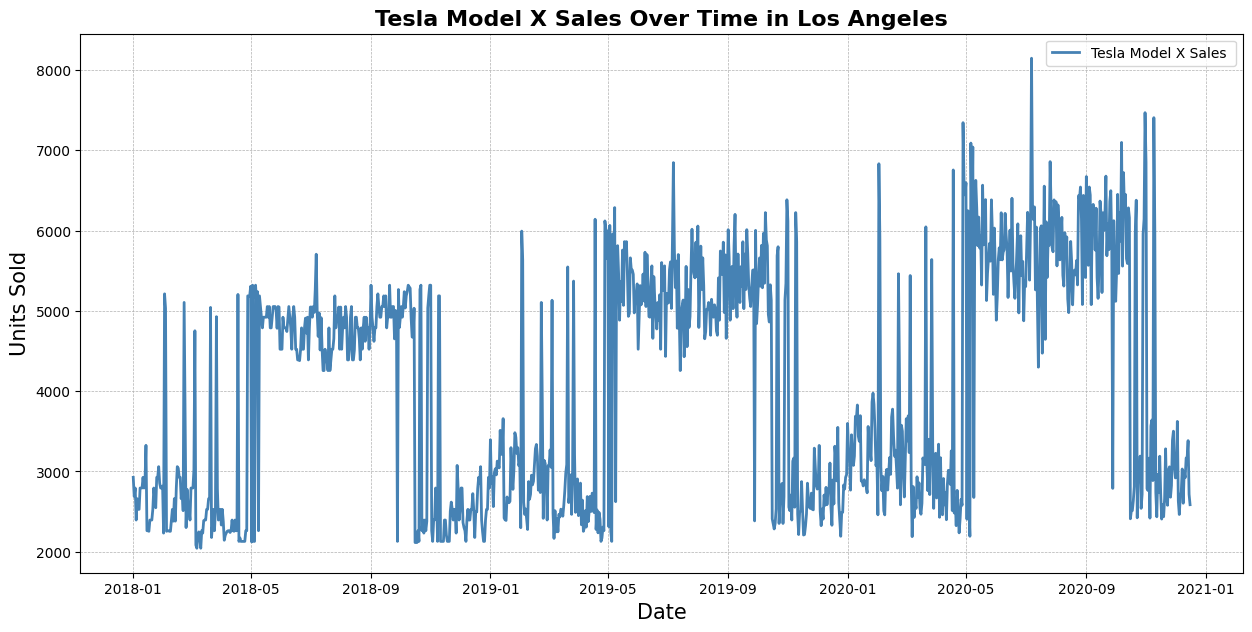

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sales
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,
             x='ds',
             y='y',
             lw=2,
             color='steelblue',
             label='Tesla Model X Sales ')


# Add titles and labels
plt.title('Tesla Model X Sales Over Time in Los Angeles', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Units Sold', fontsize=15)




# add grid 
plt.grid(visible=True,
         ls='--',
         lw='0.5')
plt.legend(loc='best')
plt.show()

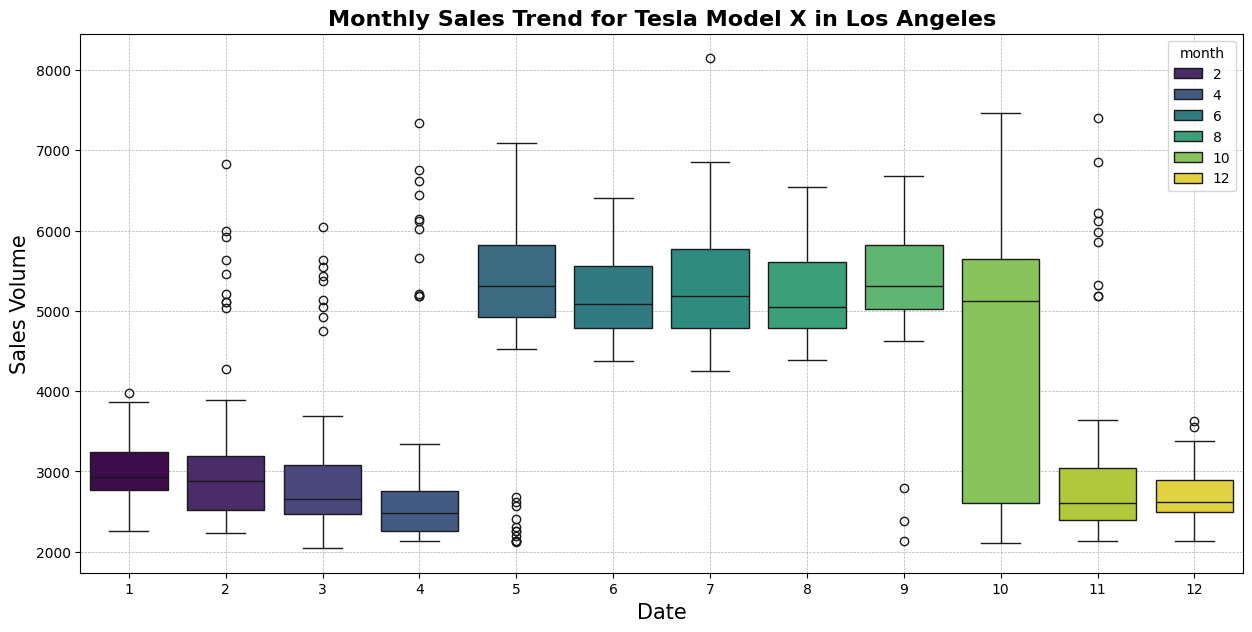

In [18]:
# Monthly sales trend 
plt.figure(figsize=(15, 7))
df['month'] = df['ds'].dt.month # Create month column and slice the ds column into months 
sns.boxplot(data=df,
            x='month',
            y='y',
            palette='viridis',
            hue='month')

# Add titles and labels
plt.title('Monthly Sales Trend for Tesla Model X in Los Angeles', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales Volume', fontsize=15)

# add grid 
plt.grid(visible=True,
         ls='--',
         lw='0.5')

plt.show()

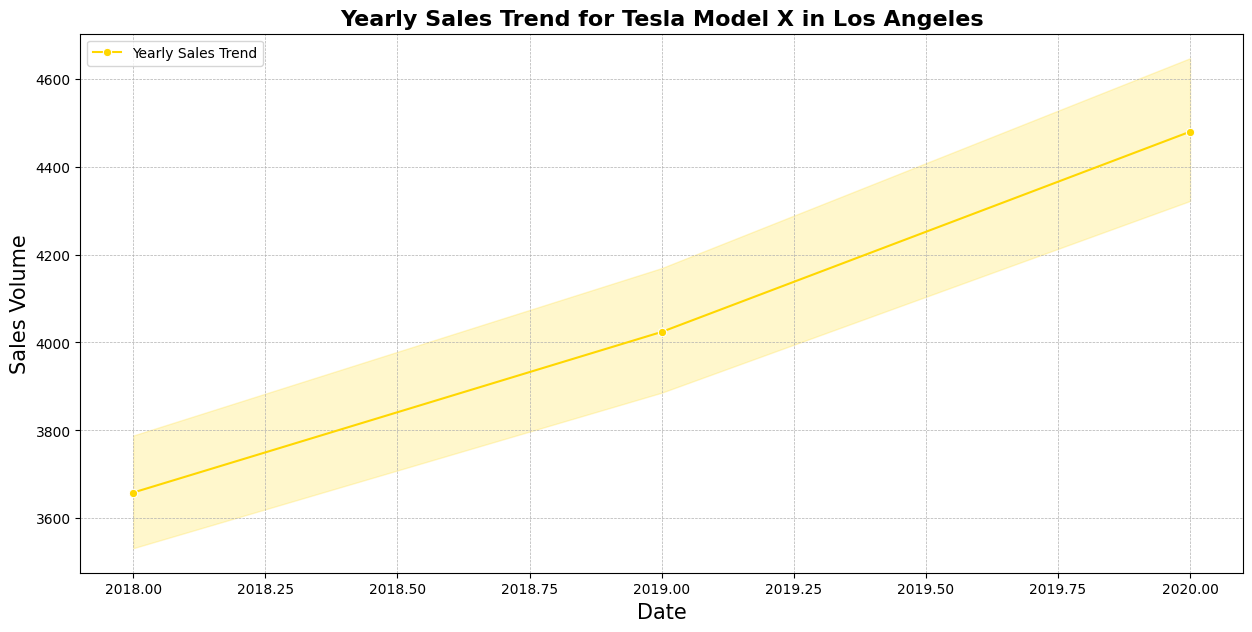

In [21]:
# Yearly sales trend 
plt.figure(figsize=(15, 7))
df['year'] = df['ds'].dt.year 
sns.lineplot(data=df,
            x='year',
            y='y',
            marker='o',
            color='gold',
            label='Yearly Sales Trend'
            )

# Add titles and labels
plt.title('Yearly Sales Trend for Tesla Model X in Los Angeles', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Sales Volume', fontsize=15)

# add grid 
plt.grid(visible=True,
         ls='--',
         lw='0.5')

plt.show()


### **Machine learning**

### **Evaluation**

### **Model Fine-Tuning**